# Estudo para a prova:
## Sumario:
### Pipeline ML
#### 1- Definir o problema
##### - Qual é a tarefa que queremos ensinar um computador a fazer?
#### 2- Coletar os dados
##### - Escolher uma base de dados do gagle basica para testes
##### - Dividir os dados de teste em 3 grupos: Treino, Validação e Teste
#### 3- Extração de Características (features)
##### - Avaliar as caracteriticas importantes da base estudada
##### - Não é uma tarefa fácil.
#### 4- Treinamento do modelo
##### - Usar o conjunto de testes para isso
#### 5- Testar o desempenho do modelo treinado
##### - Usar o conjunto de testes para isso
##### - medir a sua capacidade de generalização ao classificar outras imagens de cães e gatos não apresentados na etapa de treinamento

### Criando um Ambiente Virtual

In [1]:
!python -m venv --system-site-packages ./projeto_ml
!projeto_ml\Scripts\activate
!ipython kernel install --user --name=projeto_ml


/bin/bash: linha 1: projeto_mlScriptsactivate: comando não encontrado
Installed kernelspec projeto_ml in /home/filipedc/.local/share/jupyter/kernels/projeto_ml


# -> Aperete F5 e escolha o kernel "projeto_ml" <-

In [2]:
!pip install opencv-python
!pip install tensorflow 
#São cerca de 500 MB de dowload então pode demorar bastante.

!pip install tensorflow-datasets


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


# Aplicando Imports

In [3]:
# para tratar arquivos e diretorios
import os
import pathlib

#para tratar numeros e arrays
import numpy as np
import pandas as pd

#para o uso de machine Learning
import tensorflow as tf
import tensorflow_datasets as tfds


#para tratar imagens
import cv2

#para plotar graficos
import matplotlib.pyplot as plt
import PIL

2022-10-30 16:01:32.705822: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-30 16:01:32.705858: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-30 16:01:32.808846: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-30 16:01:34.745823: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-10-30 16:01:34.746009: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: ca

# 1 Entendimento do negocio

## Defina o objetivo em termos de negócios
- Ao buscar na internet soluções em graficos é necessario que haja uma forma automatizada de encontrar graficos e defini-los
- Há também a possibilidade de gerar uma metrica de quantidade de graficos e suas relações, e por fim aplicar um verificador de graficos.

## Como a solução será usada?
- Como ferramenta de busca de graficos em determinado escopo ou como ferramenta de enssino.

## Quais as soluções/alternativas atuais (caso existam)?
- atualmente algumas ferramentas de busca já realizam a comparação entre imagens e muitas até usam isso, mas a proposta é apresentar uma ferramenta apropriada para esse tipo de reconhecimento: Definir o tipo de grafico.

## Como você deve abordar este problema (supervisionado/não supervisionado, etc)?
- Aprendizado supervisionado: busco encontrar predições a partir de imagens.
- Usarei tecnicas de deepLearning.

## Como o desempenho deve ser medido?
- Matrizes de confusão e metricas como percentual de acerto, etc.

## A medida de desempenho está alinhada com o objetivo do negócio?
- Sim, o algoritmo precisa de acurácia 

## Qual seria o desempenho mínimo para alcançar o objetivo
- acima de 90% de acerto seria um resultado.
- porém, busca-se valores acima de 95% 

## Tem especialista humano disponível?
- Eu mesmo posso definir e diferenciar determinados graficos.

## É possível reutilizar experiências ou ferramentas de outros contextos?
- o Google é uma caixa-preta, não posso usar o algoritmos deles aqui, porem já existem trabalhos neste sentido, mas ainda não consegui usá-los.

## Como você resolveria o problema manualmente
- Manualmente seria uma tarefa muito simples, ao visualizar um grafico eu definiria seu tipo, porem para fazer isso em muitas imagens isso poderia demanfdar muito tempo.

## Produza um plano do projeto selecionando as tecnologias e ferramentas e definindo planos detalhados para cada fase do projeto

### Planejamento
- Este projeto tem como finalidade desenvolver uma ferramenta de deeplearn capaz de diferenciar alguns tipos de graficos e propiciar uma predição apartir de dada uma imagem, ter como resposta um grafico.

#### Tecnologias
- para isso usarei algumas ferramentas:
    - Anaconda, para ser usada como ambiente de desenvoolvimento e facilitar o import de diversas libs.
    - A "IDE" Jupyter Lab / Jupyter Notebook para o sesemvolvimento estruturado e para a apresentação de resultados.
    - A linguagem de de sexemvolvimento Python 3.9
    - Dados encontrados na plataforma kaggle.
    
#### Ferramentas
- como ferrementas vou usar algumas libs:
    - TensorFlow, para aplicar o deeplearn
    - cv2, para tratamento de imagens
    - 
    
#### Detalhamento das fazes do projeto
1. encontrar imagens para serem usadas como dados da ferramenta.
2. tratar esses dados
    - possivelmente as imgens virão todas juntas em uma unica pastas, separá-las sera um pequeno desafio.
    - Definir quais imagems podem ser usadas e quais não podem.
    - Realizar um tratamento nas imagens para encontrar resultados validos.
3. Desenvolver o algoritmo para reconhecimento de imagens.
4. testar o algoritmo usando dados separados para esse fim.
5. Desenvolver uma ferramamenta mobile que realize o reconhecimento.

# 2. Compreensão dos dados
## Colete os dados de que você precisa e de quanto precisa.
- Os dados foram encontrados no seguinte endereço: [Kaggle](https://www.kaggle.com/datasets/sunedition/graphs-dataset)
- Para o meu projeto eu preferi baixar os dados.

## Verifique quanto de espaço esses dados ocuparão e obtenha autorização de uso, se necessário, assegurando que as informações confidencias sejam excluídas ou protegidas (ex. deixando-as anônimas)
- Os dados possuem o tamanho aproximado de 1.09GB, relativamente pequeno.
- não são daodos sensiveis e não necessitam de alteração.
- há apenas o pedido de citação dos dados.  [Kaggle](https://www.kaggle.com/datasets/sunedition/graphs-dataset)

## Descreva os dados: examine os dados e documente suas propriedades, como formato de dados, número de registros ou identidades de campo
- Os dados são separados em 8 classes:
    - 0 - **just image**: Apenas uma imagem sem qualquer grafico
    - 1 - **bar chart**: Grafico de barras
    - 2 - **diagram**: diagrmas
    - 3 - **flow chart**: graficos de fluxo
    - 4 - **graph**: apenas um grafico
    - 5 - **growth chart**: grafico de crescimento
    - 6 - **pie chart**: grafico de pizza
    - 7 - **table**: tabela

### Trata-se e um conjunto de imagens:
- A quantidade de imagens diversas:

In [4]:
#diretorio_imagens = 'C:/Users/User/Documents/Projetos/Imagens/graphs/'
diretorio_imagens = '/home/filipedc/Documentos/Programação/python/projetoML/projetoML/graphs/'
diretorio = pathlib.Path(diretorio_imagens)
for i in list(diretorio.glob("*.*"))[:10]:
    print(i.stem)

just_image__037138a2-9b47-11ea-a010-c71373fc244b.jpg
just_image_FullMoon2010.jpg
just_image_images701.jpg
diagram_images367 (2).jpg
table_images436.jpg
flow_chart_5c58792d3f3d0450739932.png
diagram_u0Uev.png
diagram_images183.jpg
growth_chart_images275.jpg
graph_images300 (2).jpg


## Verifique a qualidade dos dados: quão “limpos/sujos” estão os dados?
- Para facilitar o tratamento das imagens decidimos trocar os nomes das imagens para facilitar o trabalho. 

In [5]:
nome_classes = [
    "just_image", 
    "bar_chart", 
    "diagram", 
    "flow_chart", 
    "graph", 
    "growth_chart", 
    "pie_chart",
    "table"
]

for classe in nome_classes:
    arquivos = diretorio.glob("*"+classe+"*.*")
    enderecos = list(arquivos)
    arquivos.close()
    for i,endereco in enumerate(enderecos):
        file = pathlib.Path(endereco)
        file.rename(str(file.with_stem(classe+"_"+str(i))))

print("Novos nomes:\n")
for i in list(diretorio.glob("*.*"))[:10]:
    print(i.stem)

Novos nomes:

growth_chart_173
flow_chart_1497
diagram_1716
bar_chart_639
table_1752
graph_933
graph_1403
flow_chart_1569
graph_988
graph_1735


##### OBS: Para facilitar o uso do data set vamos criar um dataframe usando pandas.

In [6]:

nome_classes = [
    "just_image", 
    "bar_chart", 
    "diagram", 
    "flow_chart", 
    "graph", 
    "growth_chart", 
    "pie_chart",
    "table"
]

dataset = []

for classe in nome_classes:
    print("classe: "+classe)
    for i in diretorio.glob("*"+classe+"*"):
        imagem = PIL.Image.open(i)
        dataset.append(
            [
                classe, #Nome da classse
                i.suffix, #tipo do arquivo
                i.absolute(), #Nome do arquivo
                (i.stat().st_size//1000), #Tamanho em Kb
                int(imagem.width), #largura da imagem
                int(imagem.height) #altura da imagem
            ]
        )
    

dataset_array = np.array(dataset)

ORIGINAL_DATA_SET = pd.DataFrame(
    data=dataset_array,
    columns=["classe", "tipo", "nome", "tamanho_Kb", "largura", "altura"]
)

df_dataset = ORIGINAL_DATA_SET.copy()

classe: just_image
classe: bar_chart
classe: diagram
classe: flow_chart
classe: graph
classe: growth_chart
classe: pie_chart
classe: table


#### Obs: um tratamento profundo foi necessario devido ao tipo ".gif", o qual não pode ser lido.

- Os dados que extraidos das imagens são:
    - A **classe** : o tipo de grafico
    - O **tipo**: o formato do arquivo
    - O **nomne**: o nome do arquivo
    - O **tamanho_Kb**: o tamanho do arquivo em kilobyte
    - A **largura**: a largura da imagem
    - A **altura**: a altura da imagem
   
## Explore os dados: Estude cada atributo e suas propriedades (nome, tipo, % de valores ausentes, quais atributos alvos, etc).

- Estudaremos alguns dados dos atributos extraidos

In [7]:
print("Neste projeto serão usadas %d imagens" %len(df_dataset))

Neste projeto serão usadas 15875 imagens


- Organizados da seguinte maneira:

In [8]:
df_dataset = df_dataset.astype({"classe": "str", "tipo": "str", "nome": "str", "tamanho_Kb": "int32", "largura": "int32", "altura": "int32"})
df_dataset[-5:]

,classe,tipo,nome,tamanho_Kb,largura,altura
15870,table,.jpg,/home/filipedc/Documentos/Programação/python/p...,37,275,183
15871,table,.jpg,/home/filipedc/Documentos/Programação/python/p...,30,275,183
15872,table,.jpg,/home/filipedc/Documentos/Programação/python/p...,20,189,267
15873,table,.jpg,/home/filipedc/Documentos/Programação/python/p...,39,550,203
15874,table,.jpg,/home/filipedc/Documentos/Programação/python/p...,18,300,168


- Definindo os tipos

In [9]:
df_dataset.dtypes

classe        object
tipo          object
nome          object
tamanho_Kb     int32
largura        int32
altura         int32
dtype: object

## Documente quaisquer problema de qualidade:

#### O formato não unico dos arquivos, entre elas webp, gifs e pngs...

In [10]:
df_dataset_tipo = df_dataset.groupby(["tipo"])['tipo']\
    .count()

df_dataset_tipo

tipo
.JPG        10
.gif         3
.jpeg        2
.jpg     15763
.png        96
.webp        1
Name: tipo, dtype: int64

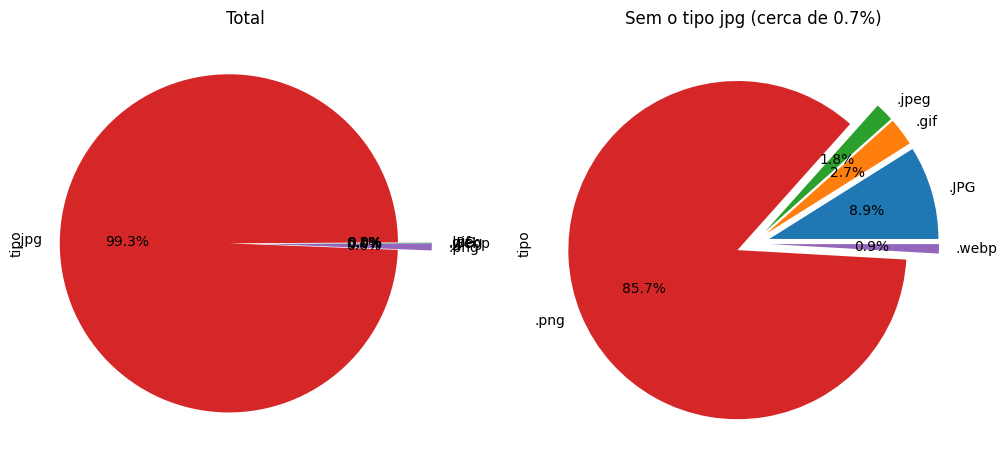

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df_dataset_tipo\
    .plot\
    .pie(
        ax = axes[0],
        figsize=(12, 12),
        autopct='%1.1f%%',
        explode=[0.1 for _ in range(len(df_dataset_tipo))]   
    )
axes[0].set_title("Total")

df_dataset_tipo\
    .drop('.jpg')\
    .plot\
    .pie(
        ax = axes[1],
        figsize=(12, 12),
        autopct='%1.1f%%',
        explode=[0.1 for _ in range(len(df_dataset_tipo)-1)]
    )
axes[1].set_title("Sem o tipo jpg (cerca de 0.7%)")
plt.show()

## Visualize os dados e estude a correlação entre os atributos
- Quanto a classe:

In [12]:
df_dataset_classe = df_dataset.groupby(["classe"])['classe'].count()
df_dataset_classe

classe
bar_chart       1982
diagram         2047
flow_chart      1703
graph           1976
growth_chart    1098
just_image      3174
pie_chart       1831
table           2064
Name: classe, dtype: int64

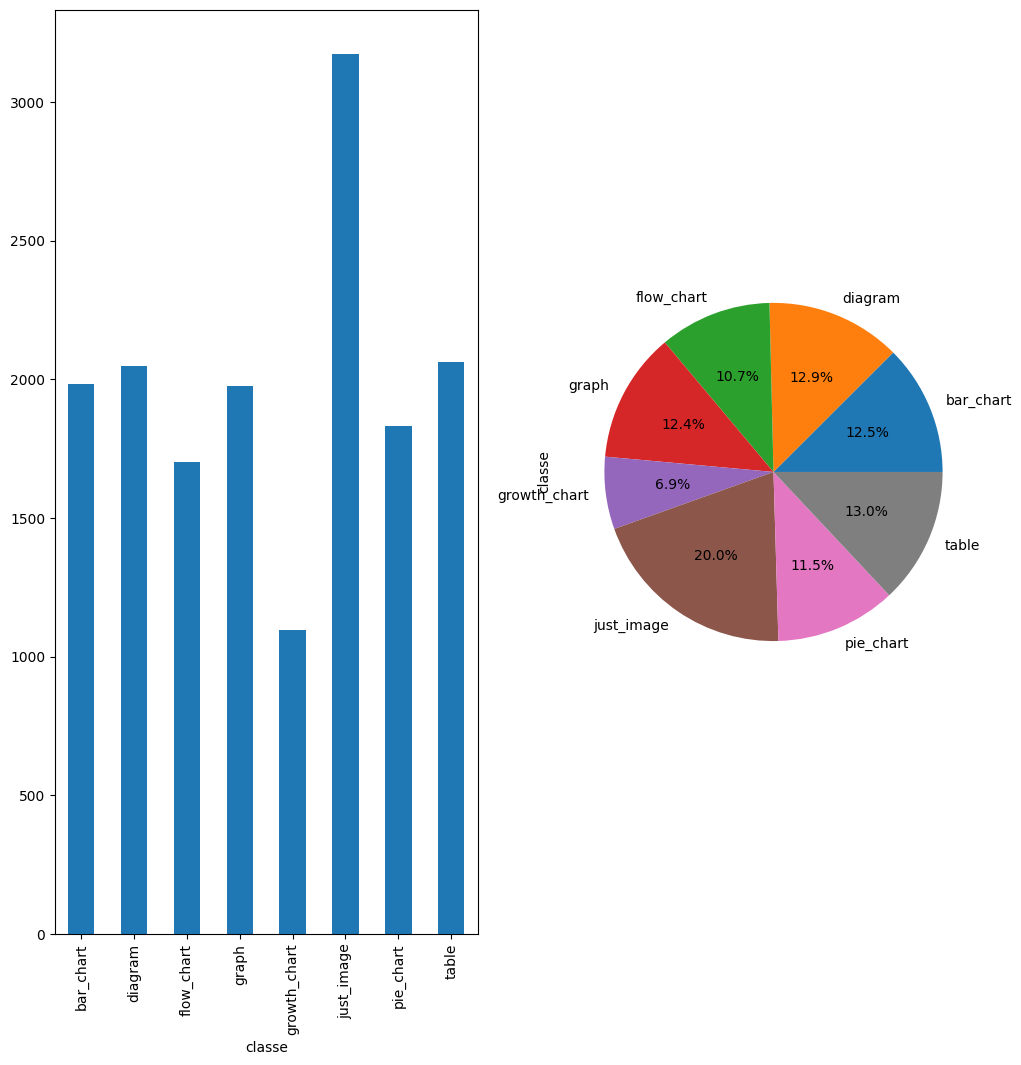

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2)

df_dataset_classe.plot.bar(ax=axes[0], figsize=(10, 10))#, autopct='%1.1f%%')
df_dataset_classe.plot.pie(ax=axes[1], figsize=(12, 12), autopct='%1.1f%%')

plt.show()

    - mosta uma certa similaridade entre as quantidades de cada tipo de classse

In [14]:
df_dataset_classe_largura_altura = df_dataset.groupby(["classe"])[["classe",'largura','altura']]

In [15]:
df_dataset_classe_largura_altura.min(numeric_only=True)

,largura,altura
classe,,
bar_chart,100,100
diagram,100,100
flow_chart,29,87
graph,100,90
growth_chart,100,100
just_image,48,48
pie_chart,100,100
table,63,78


In [16]:
df_dataset_classe_largura_altura.median(numeric_only=True)

,largura,altura
classe,,
bar_chart,286.0,194.0
diagram,278.0,197.0
flow_chart,259.0,227.0
graph,269.0,203.0
growth_chart,259.0,225.0
just_image,283.0,225.0
pie_chart,275.0,194.0
table,300.0,228.0


In [17]:
df_dataset_classe_largura_altura.max(numeric_only=True)

,largura,altura
classe,,
bar_chart,3638,3307
diagram,3750,3750
flow_chart,3495,4726
graph,5000,3750
growth_chart,5576,4000
just_image,6070,4912
pie_chart,5120,5120
table,7682,5775


### 3. Preparação dos dados
### - Uma regra comum é que 80% do projeto é a preparação de dados
#### ❑ Selecionar dados: Determine quais os conjuntos de dados serão usados e documente os motivos da inclusão/exclusão
    - Para esse projeto a quantidade de dados deva ser almentada em alguns pontos...
    - Uma redução pontual do numero de classes chamadas de "just_image" não é necessária, mesmo possuindo uma quantidade desbalanceada quando comparada com o restante do dataset, esse valor não se mostra expressivo a ponto desta redução.

#### ❑ Limpeza de dados
##### ❑ Corrigir oou remover outiliers (opcional)
    -Diante da analize dos dados não foram encontrados valores discrepantes entre si, haja vista a redução da escala de cada imagens para um tamanho expecifico o que redusiu a diferença na maioria das caracteriticas.


In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


##### ❑ Preencher valores ausentes (missing values) ou eliminar suas instâncias (ou colunas)
    - Não é necessario, devido ao fato de se tratar de uma base de dados de imagens.
#### ❑ Seleção de características (opcional): eliminar (“dropa”) os atributos que não fornecem informações úteis para a tarefa
    - não hã caracteriticas que devam ser eliminadas.
#### ❑ Engenharia de Atributos ou de características (Feature Engineering): reformatar os dados conforme necessário. Por exemplo, discretizar características contínuas, realizar transformações (ex.: log(x), sqrt(x), etc.), compor novas características a partir das existentes, padronizar ou normalizar as características, etc
    - Não ha essa necessidade.

### 4. Modelagem
#### 1. Treine muitos modelos rápidos e simples de diferentes categorias (ex.: linear, Naive Bayes, SVM, random florest, rede neural, etc) usando parâmetros-padrão
#### 2. Medir e comparar o desempenho (ex: média e desvio-padrão do erro). Para cada modelo é interessante usar a validação cruzada k-fold
#### 3. Analise as variáveis mais significativas para cada algoritmo
#### 4. Analise os erros que os modelos cometem
#### 5. Execute uma rodada rápida de seleção de características e feature engineering
#### 6. Rode mais uma ou duas iterações rápidas das 5 etapas anteriores
#### 7. Faça uma pré-seleção de 3 à 5 modelos com melhor desempenho

### 5. Avaliação
#### ❑ Avalie os resultados: Os modelos atendem aos critérios de sucesso do negócio? Qual(is) devemos aprovar para o negócio?
#### ❑ Processo de revisão: Revise o trabalho realizado. Alguma coisa foi esquecida? Todas as etapas foram executadas corretamente? Resuma as descobertas e corrija qualquer coisa, se necessário
#### ❑ Apresente sua solução. Documentar o que foi feito, explicar porque sua solução alcança o objetivo do negócio, etc
#### ❑ Determine as próximas etapas: Com base nas três tarefas anteriores, determine se deve continuar com a implantação, iterar mais ou iniciar novos projetos Importante: não ajuste seu modelo depois de medir o erro de generalização: você simplesmente começaria a ajustar o conjunto de teste

### 6. Implantação
#### ❑ Planejar a implantação: Desenvolva e documente um plano para implantar o modelo.
#### ❑ Plano de monitoramento e manutenção: Desenvolva um plano completo de monitoramento e manutenção para evitar problemas durante a fase operacional (ou fase pós-projeto) de um modelo.
#### ❑ Produzir relatório final: A equipe do projeto documenta um resumo do projeto que pode incluir uma apresentação final dos resultados da mineração de dados.
#### ❑ Revisão do projeto: Conduza uma retrospectiva do projeto sobre o que deu certo, o que poderia ter sido melhor e como melhorar no futuro

In [ ]:
https://www.tensorflow.org/tutorials/load_data/images?hl=pt-br
https://www.tensorflow.org/tutorials/load_data/pandas_dataframe?hl=pt-br